In [1]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
# Read each CSV file into DataFrame
air_quality_cleaned = pd.read_csv('air_quality_data_cleaned/air_quality_data_cleaned.csv')

air_quality_cleaned.head()

,Unnamed: 0,Date,STATE_CODE,SITE_LATITUDE,SITE_LONGITUDE,Daily Mean PM2.5 Concentration,DAILY_AQI_VALUE,PERCENT_COMPLETE
0,0,01/13/2001,4,34.058475,-109.441259,0.8,3,100.0
1,1,01/16/2001,4,34.058475,-109.441259,1.7,7,100.0
2,2,02/21/2001,4,34.058475,-109.441259,1.3,5,100.0
3,3,02/24/2001,4,34.058475,-109.441259,1.6,7,100.0
4,4,02/27/2001,4,34.058475,-109.441259,2.1,9,100.0


In [3]:
# Remove first column
air_quality_cleaned = air_quality_cleaned[['Date', 'STATE_CODE','SITE_LATITUDE','SITE_LONGITUDE',
                                           'Daily Mean PM2.5 Concentration','DAILY_AQI_VALUE','PERCENT_COMPLETE']]
air_quality_cleaned.head()

,Date,STATE_CODE,SITE_LATITUDE,SITE_LONGITUDE,Daily Mean PM2.5 Concentration,DAILY_AQI_VALUE,PERCENT_COMPLETE
0,01/13/2001,4,34.058475,-109.441259,0.8,3,100.0
1,01/16/2001,4,34.058475,-109.441259,1.7,7,100.0
2,02/21/2001,4,34.058475,-109.441259,1.3,5,100.0
3,02/24/2001,4,34.058475,-109.441259,1.6,7,100.0
4,02/27/2001,4,34.058475,-109.441259,2.1,9,100.0


In [4]:
# Sorted date by ascending order
air_quality_cleaned = air_quality_cleaned.sort_values('Date', ascending = True)
air_quality_cleaned.head(10)

,Date,STATE_CODE,SITE_LATITUDE,SITE_LONGITUDE,Daily Mean PM2.5 Concentration,DAILY_AQI_VALUE,PERCENT_COMPLETE
143121,01/01/2001,6,37.645710,-118.966520,28.0,84,100.0
149717,01/01/2001,6,39.138773,-121.618549,54.0,147,100.0
149654,01/01/2001,6,39.138773,-121.618549,54.0,147,100.0
2111168,01/01/2001,56,44.797161,-106.949853,27.2,83,100.0
663,01/01/2001,4,34.229733,-111.329500,23.9,76,100.0
149349,01/01/2001,6,38.102507,-122.237976,78.0,163,100.0
2111287,01/01/2001,56,44.815142,-106.955933,29.2,87,100.0
149233,01/01/2001,6,41.711825,-121.509993,1.5,6,100.0
2111406,01/01/2001,56,42.974831,-109.758655,0.7,3,100.0
1666925,01/01/2001,49,41.492707,-112.018863,41.7,116,100.0


In [5]:
# Data type for each column
air_quality_cleaned.dtypes

Date                               object
STATE_CODE                          int64
SITE_LATITUDE                     float64
SITE_LONGITUDE                    float64
Daily Mean PM2.5 Concentration    float64
DAILY_AQI_VALUE                     int64
PERCENT_COMPLETE                  float64
dtype: object

In [6]:
# Check to see if DataFrame has missing values (NaN)
missing = air_quality_cleaned.isna().sum()
print(missing)

Date                              0
STATE_CODE                        0
SITE_LATITUDE                     0
SITE_LONGITUDE                    0
Daily Mean PM2.5 Concentration    0
DAILY_AQI_VALUE                   0
PERCENT_COMPLETE                  0
dtype: int64


In [7]:
# Check size of dataframe
air_quality_cleaned.shape

(2172855, 7)

In [8]:
# Check for duplicate records
duplicate_records = air_quality_cleaned[air_quality_cleaned.duplicated()]
duplicate_records

,Date,STATE_CODE,SITE_LATITUDE,SITE_LONGITUDE,Daily Mean PM2.5 Concentration,DAILY_AQI_VALUE,PERCENT_COMPLETE
149654,01/01/2001,6,39.138773,-121.618549,54.0,147,100.0
145832,01/01/2001,6,34.510961,-117.325540,19.0,66,100.0
138122,01/01/2001,6,38.944979,-119.970609,31.0,91,100.0
958629,01/01/2001,8,39.827594,-104.937668,30.2,89,100.0
1071968,01/01/2001,16,43.562401,-116.563232,17.7,63,100.0
...,...,...,...,...,...,...,...
1806409,12/31/2021,49,40.902967,-111.884467,2.6,11,100.0
1809985,12/31/2021,49,40.784220,-111.931000,2.8,12,100.0
1817572,12/31/2022,49,41.842649,-111.852199,1.9,8,100.0
1063875,12/31/2022,8,39.751184,-104.987625,16.2,60,100.0


In [9]:
# Generate summary statistics
# The mean is sensitive to outliers
# The fact the mean is so small compared to the max value indicates the max value is an outlier.
air_quality_cleaned.describe()

,STATE_CODE,SITE_LATITUDE,SITE_LONGITUDE,Daily Mean PM2.5 Concentration,DAILY_AQI_VALUE,PERCENT_COMPLETE
count,2.172855e+06,2.172855e+06,2.172855e+06,2.172855e+06,2.172855e+06,2172855.0
mean,2.345199e+01,3.985615e+01,-1.162062e+02,8.545081e+00,3.213345e+01,100.0
std,1.946563e+01,5.118863e+00,5.608370e+00,9.080626e+00,2.346847e+01,0.0
min,4.000000e+00,3.133720e+01,-1.246249e+02,-7.200000e+00,0.000000e+00,100.0
25%,6.000000e+00,3.518520e+01,-1.212685e+02,3.800000e+00,1.600000e+01,100.0
50%,1.600000e+01,3.918919e+01,-1.174263e+02,6.300000e+00,2.600000e+01,100.0
75%,4.100000e+01,4.478822e+01,-1.119310e+02,1.040000e+01,4.300000e+01,100.0
max,5.600000e+01,4.876278e+01,-1.031229e+02,8.241000e+02,7.140000e+02,100.0


<AxesSubplot: >

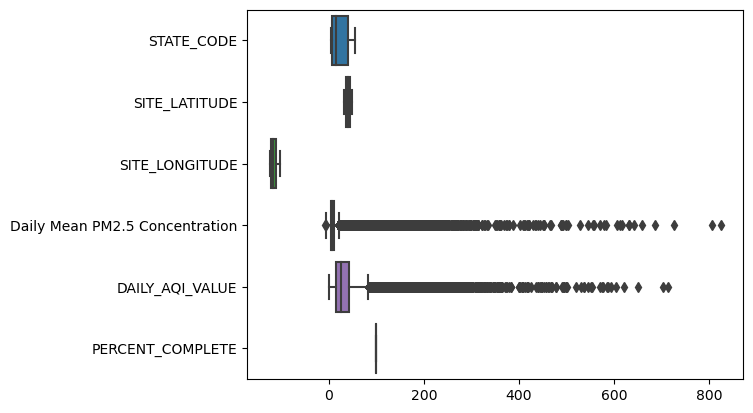

In [10]:
# Box Plot of attributes to visualize outliers

sns.boxplot(data=air_quality_cleaned[['STATE_CODE','SITE_LATITUDE','SITE_LONGITUDE','Daily Mean PM2.5 Concentration',
                                      'DAILY_AQI_VALUE','PERCENT_COMPLETE']], orient="h")

In [11]:
# Inter Quartile Range approach to finding the outliers
# create a function to find outliers using IQR
# https://careerfoundry.com/en/blog/data-analytics/how-to-find-outliers/
def find_outliers(air_quality_cleaned):
   q1 = air_quality_cleaned.quantile(0.25)
   q3 = air_quality_cleaned.quantile(0.75)
   IQR = q3 - q1

   outliers = air_quality_cleaned[((air_quality_cleaned<(q1-1.5*IQR)) | (air_quality_cleaned>(q3+1.5*IQR)))]

   return outliers

In [12]:
outliers = find_outliers(air_quality_cleaned['Daily Mean PM2.5 Concentration'])

print('Number of outliers: ' + str(len(outliers)))
print()
print('Outlier max value: ' + str(outliers.max()))
print()
print('Outlier min value: ' + str(outliers.min()))
print()
outliers

Number of outliers: 138171

Outlier max value: 824.1

Outlier min value: -7.2



143121     28.0
149717     54.0
149654     54.0
2111168    27.2
663        23.9
           ... 
1348135    20.6
1349225    21.8
132543     23.8
1069364    29.4
130869     50.3
Name: Daily Mean PM2.5 Concentration, Length: 138171, dtype: float64

In [13]:
outliers = find_outliers(air_quality_cleaned['DAILY_AQI_VALUE'])

print('Number of outliers: ' + str(len(outliers)))
print()
print('Outlier max value: ' + str(outliers.max()))
print()
print('Outlier min value: ' + str(outliers.min()))
print()
outliers

Number of outliers: 66068

Outlier max value: 714

Outlier min value: 84



143121      84
149717     147
149654     147
149349     163
2111287     87
          ... 
1069466     90
127740     137
1819679     84
1069364     87
130869     137
Name: DAILY_AQI_VALUE, Length: 66068, dtype: int64

## Cleaned Fire Data

In [14]:
# Read each CSV file into DataFrame
fire_data_cleaned = pd.read_csv('fire_data_cleaned/fire_data_cleaned.csv')

fire_data_cleaned.head()

,Unnamed: 0,acq_date,acq_time,latitude,longitude,brightness,frp,daynight,confidence,daynight_num
0,20,2001-01-02,618,33.4115,-110.8618,304.1,45.3,N,59,0
1,21,2001-01-02,619,36.7729,-118.8688,303.0,10.6,N,52,0
2,56,2001-01-02,1820,37.7012,-109.3073,312.8,15.0,D,73,1
3,57,2001-01-02,1821,32.8952,-105.6414,308.3,18.0,D,67,1
4,58,2001-01-02,1821,33.4129,-110.8626,317.3,15.8,D,77,1


In [15]:
# Remove first column
fire_data_cleaned = fire_data_cleaned[['acq_date','acq_time','latitude','longitude','brightness','frp','daynight',
                                       'confidence','daynight_num']]
fire_data_cleaned.head()

,acq_date,acq_time,latitude,longitude,brightness,frp,daynight,confidence,daynight_num
0,2001-01-02,618,33.4115,-110.8618,304.1,45.3,N,59,0
1,2001-01-02,619,36.7729,-118.8688,303.0,10.6,N,52,0
2,2001-01-02,1820,37.7012,-109.3073,312.8,15.0,D,73,1
3,2001-01-02,1821,32.8952,-105.6414,308.3,18.0,D,67,1
4,2001-01-02,1821,33.4129,-110.8626,317.3,15.8,D,77,1


In [16]:
# Sorted date by ascending order
fire_data_cleaned = fire_data_cleaned.sort_values('acq_date', ascending = True)
fire_data_cleaned.head(10)

,acq_date,acq_time,latitude,longitude,brightness,frp,daynight,confidence,daynight_num
0,2001-01-02,618,33.4115,-110.8618,304.1,45.3,N,59,0
1,2001-01-02,619,36.7729,-118.8688,303.0,10.6,N,52,0
2,2001-01-02,1820,37.7012,-109.3073,312.8,15.0,D,73,1
3,2001-01-02,1821,32.8952,-105.6414,308.3,18.0,D,67,1
4,2001-01-02,1821,33.4129,-110.8626,317.3,15.8,D,77,1
30,2001-01-03,1904,32.8122,-116.6818,354.9,94.7,D,98,1
31,2001-01-03,1904,32.8098,-116.6686,339.9,52.4,D,91,1
32,2001-01-03,1904,32.8196,-116.7257,334.8,44.0,D,79,1
33,2001-01-03,1904,32.8173,-116.7125,331.9,36.5,D,51,1
34,2001-01-03,1904,32.8151,-116.6999,328.4,28.4,D,38,1


In [17]:
# Data type for each column
fire_data_cleaned.dtypes

acq_date         object
acq_time          int64
latitude        float64
longitude       float64
brightness      float64
frp             float64
daynight         object
confidence        int64
daynight_num      int64
dtype: object

In [18]:
# Check to see if DataFrame has missing values (NaN)
missing = fire_data_cleaned.isna().sum()
print(missing)

acq_date        0
acq_time        0
latitude        0
longitude       0
brightness      0
frp             0
daynight        0
confidence      0
daynight_num    0
dtype: int64


In [19]:
# Check size of dataframe
fire_data_cleaned.shape

(902376, 9)

In [20]:
# Check for duplicate records
duplicate_records = fire_data_cleaned[fire_data_cleaned.duplicated()]
duplicate_records

,acq_date,acq_time,latitude,longitude,brightness,frp,daynight,confidence,daynight_num


In [21]:
# Generate summary statistics
# The mean is sensitive to outliers
# The fact the mean is so small compared to the max value indicates the max value is an outlier.
fire_data_cleaned.describe()

,acq_time,latitude,longitude,brightness,frp,confidence,daynight_num
count,902376.000000,902376.000000,902376.000000,902376.000000,902376.000000,902376.000000,902376.000000
mean,1520.461149,41.392008,-116.840900,332.800366,109.022225,73.456136,0.640469
std,633.488378,4.659137,5.196564,29.162366,307.847647,24.634121,0.479863
min,354.000000,31.332800,-124.665500,300.000000,-59.200000,0.000000,0.000000
25%,914.000000,37.639500,-121.168300,313.000000,16.500000,57.000000,0.000000
50%,1853.000000,41.633900,-118.116200,325.600000,34.600000,78.000000,1.000000
75%,2037.000000,45.412725,-113.314800,342.900000,83.900000,97.000000,1.000000
max,2221.000000,48.992500,-102.043300,508.800000,16146.400000,100.000000,1.000000


<AxesSubplot: >

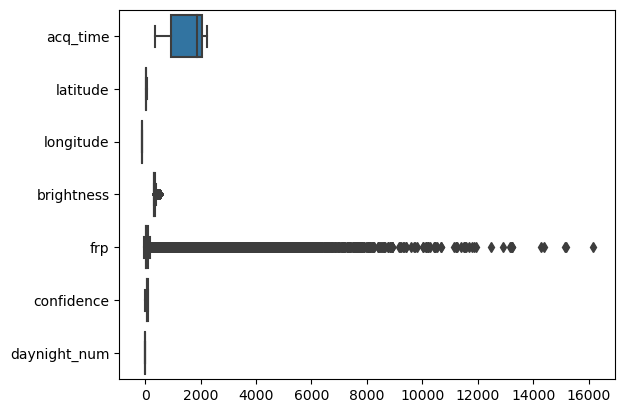

In [22]:
# Box Plot of attributes to visualize outliers

sns.boxplot(data=fire_data_cleaned[['acq_time','latitude','longitude','brightness','frp','confidence','daynight_num']], 
            orient="h")

In [23]:
# Inter Quartile Range approach to finding the outliers
# create a function to find outliers using IQR
# https://careerfoundry.com/en/blog/data-analytics/how-to-find-outliers/
def find_outliers(fire_data_cleaned):
   q1 = fire_data_cleaned.quantile(0.25)
   q3 = fire_data_cleaned.quantile(0.75)
   IQR = q3 - q1

   fire_outliers = fire_data_cleaned[((fire_data_cleaned<(q1-1.5*IQR)) | (fire_data_cleaned>(q3+1.5*IQR)))]

   return fire_outliers

In [24]:
fire_outliers = find_outliers(fire_data_cleaned['frp'])

print('Number of outliers: ' + str(len(fire_outliers)))
print()
print('Outlier max value: ' + str(fire_outliers.max()))
print()
print('Outlier min value: ' + str(fire_outliers.min()))
print()
fire_outliers

Number of outliers: 106200

Outlier max value: 16146.4

Outlier min value: 185.1



39         657.8
44         276.5
45        1165.7
46        1228.2
40        2284.5
           ...  
902368     230.8
902360     190.0
902364    1710.1
902362     227.7
902359     192.6
Name: frp, Length: 106200, dtype: float64